In [60]:
# Import the necessary libraries for data manipulation and visualization
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Import libraries for label encoding, model training, and evaluation
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.tree import DecisionTreeClassifier  # For training a Decision Tree classifier
import xgboost as xgb  # For training an XGBoost classifier

# Import libraries for model evaluation metrics
from sklearn.metrics import accuracy_score  # For calculating accuracy
from sklearn.metrics import confusion_matrix  # For creating a confusion matrix
from sklearn.metrics import classification_report  # For detailed classification metrics
from sklearn.metrics import roc_curve, roc_auc_score  # For ROC curve and AUC score calculations

# Ensure that visualizations are displayed inline
%matplotlib inline

In [24]:
# Extract: Loading data from the CSV file
data = pd.read_csv("SKYWARDS_DATA_CW3 (2) (2) (1).csv", encoding="latin1")
data.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,N,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,0,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


In [25]:
# Displaying initial information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wifi service              1039

In [26]:
# Transform: Data Cleaning and Transformation

# 1. Handling Missing Values
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Ref                                    0
id                                     0
Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Destination                            0
Continent                              0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service         

In [27]:
# Dropping rows where 'Arrival Delay in Minutes' is missing, assuming it is crucial for our analysis
data.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [28]:
# 2. Converting Data Types
# 'Arrival Delay in Minutes' is currently float64, converting it to int64
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].astype(int)

In [29]:
# 3. Feature Engineering
# For instance creating a new feature that calculates the total delay
data['Total Delay in Minutes'] = data['Departure Delay in Minutes'] + data['Arrival Delay in Minutes']

In [30]:
# Display the transformed data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Ref                                103594 non-null  int64 
 1   id                                 103594 non-null  int64 
 2   Gender                             103594 non-null  object
 3   Satisfied                          103594 non-null  object
 4   Age                                103594 non-null  int64 
 5   Age Band                           103594 non-null  object
 6   Type of Travel                     103594 non-null  object
 7   Class                              103594 non-null  object
 8   Flight Distance                    103594 non-null  int64 
 9   Destination                        103594 non-null  object
 10  Continent                          103594 non-null  object
 11  Inflight wifi service              103594 non-null  int64

In [31]:
data.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Total Delay in Minutes
0,0,70172,Male,N,13,Under 18,Personal Travel,Eco Plus,4760,India,...,0,4,3,4,4,5,5,25,18,43
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,5,3,1,4,1,1,6,7
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,4,3,4,4,4,5,0,0,0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,5,3,1,4,2,11,9,20
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,3,3,4,4,3,3,3,0,0,0


In [32]:
# Load: Saving the cleaned and transformed data to a new CSV file
data.to_csv("Transformed_SKYWARDS_DATA.csv", index=False)
print("Data Loaded Successfully")

Data Loaded Successfully


# **Exploratory Data Analysis**

In [33]:
# Load the transformed data
data = pd.read_csv("Transformed_SKYWARDS_DATA.csv")

In [36]:
# Summary statistics for numerical columns
numerical_summary = data.describe()
print("Numerical Summary:\n")

numerical_summary

Numerical Summary:



,Ref,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Total Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,...,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,51950.102274,64942.428625,39.380466,4164.102361,2.522221,3.060032,2.756936,2.976968,3.202019,3.250372,...,3.124476,3.382493,3.351275,3.631562,3.304216,3.640665,3.286291,14.750719,15.181275,29.931994
std,29997.914016,37460.816597,15.113125,1346.755729,1.447998,1.525301,1.398998,1.277805,1.329494,1.349531,...,1.560829,1.288409,1.315519,1.181204,1.265502,1.175762,1.312294,38.200249,38.774453,76.310248
min,0.000000,1.000000,7.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25960.250000,32562.250000,27.000000,4760.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,51955.500000,64890.000000,40.000000,4760.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,2.000000
75%,77924.750000,97370.500000,51.000000,4760.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,24.000000
max,103903.000000,129880.000000,85.000000,5940.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,3176.000000


In [37]:
# Summary statistics for categorical columns
categorical_summary = data.describe(include=['object'])
print("\nCategorical Summary:\n")

categorical_summary


Categorical Summary:



,Gender,Satisfied,Age Band,Type of Travel,Class,Destination,Continent
count,103594,103594,103594,103594,103594,103594,103594
unique,2,2,7,2,3,99,6
top,Female,Y,35 to 44,Business travel,Business,India,Asia
freq,52576,77878,24079,71465,49533,83683,85536


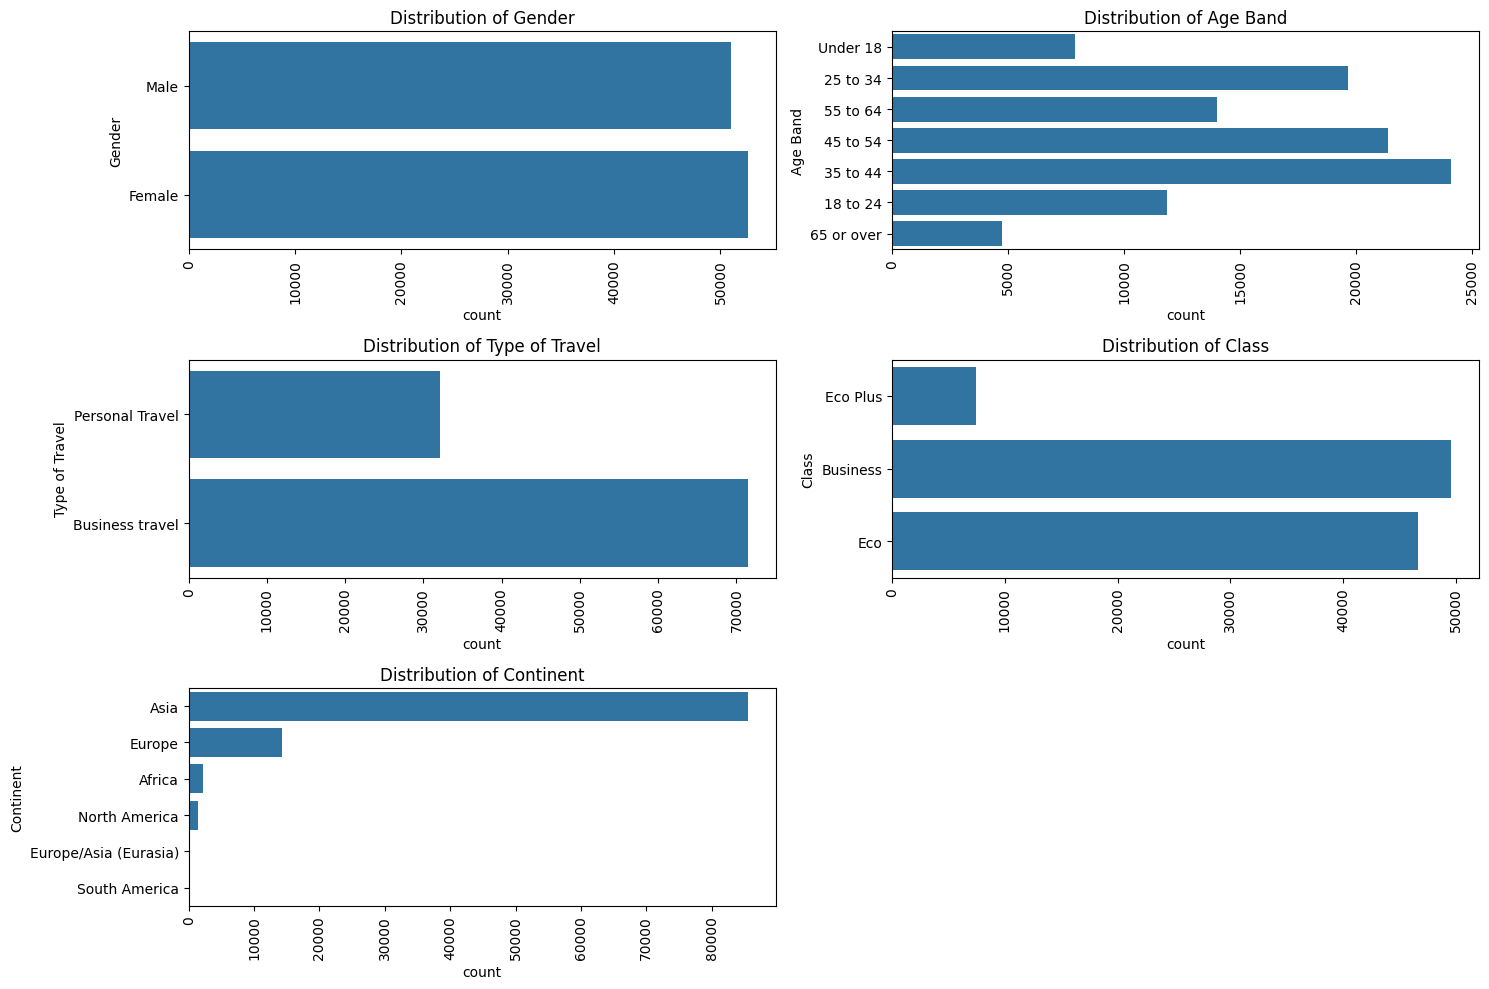

In [39]:
# Count plots for categorical variables
categorical_columns = ['Gender', 'Age Band', 'Type of Travel', 'Class', 'Continent']

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data[column])
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

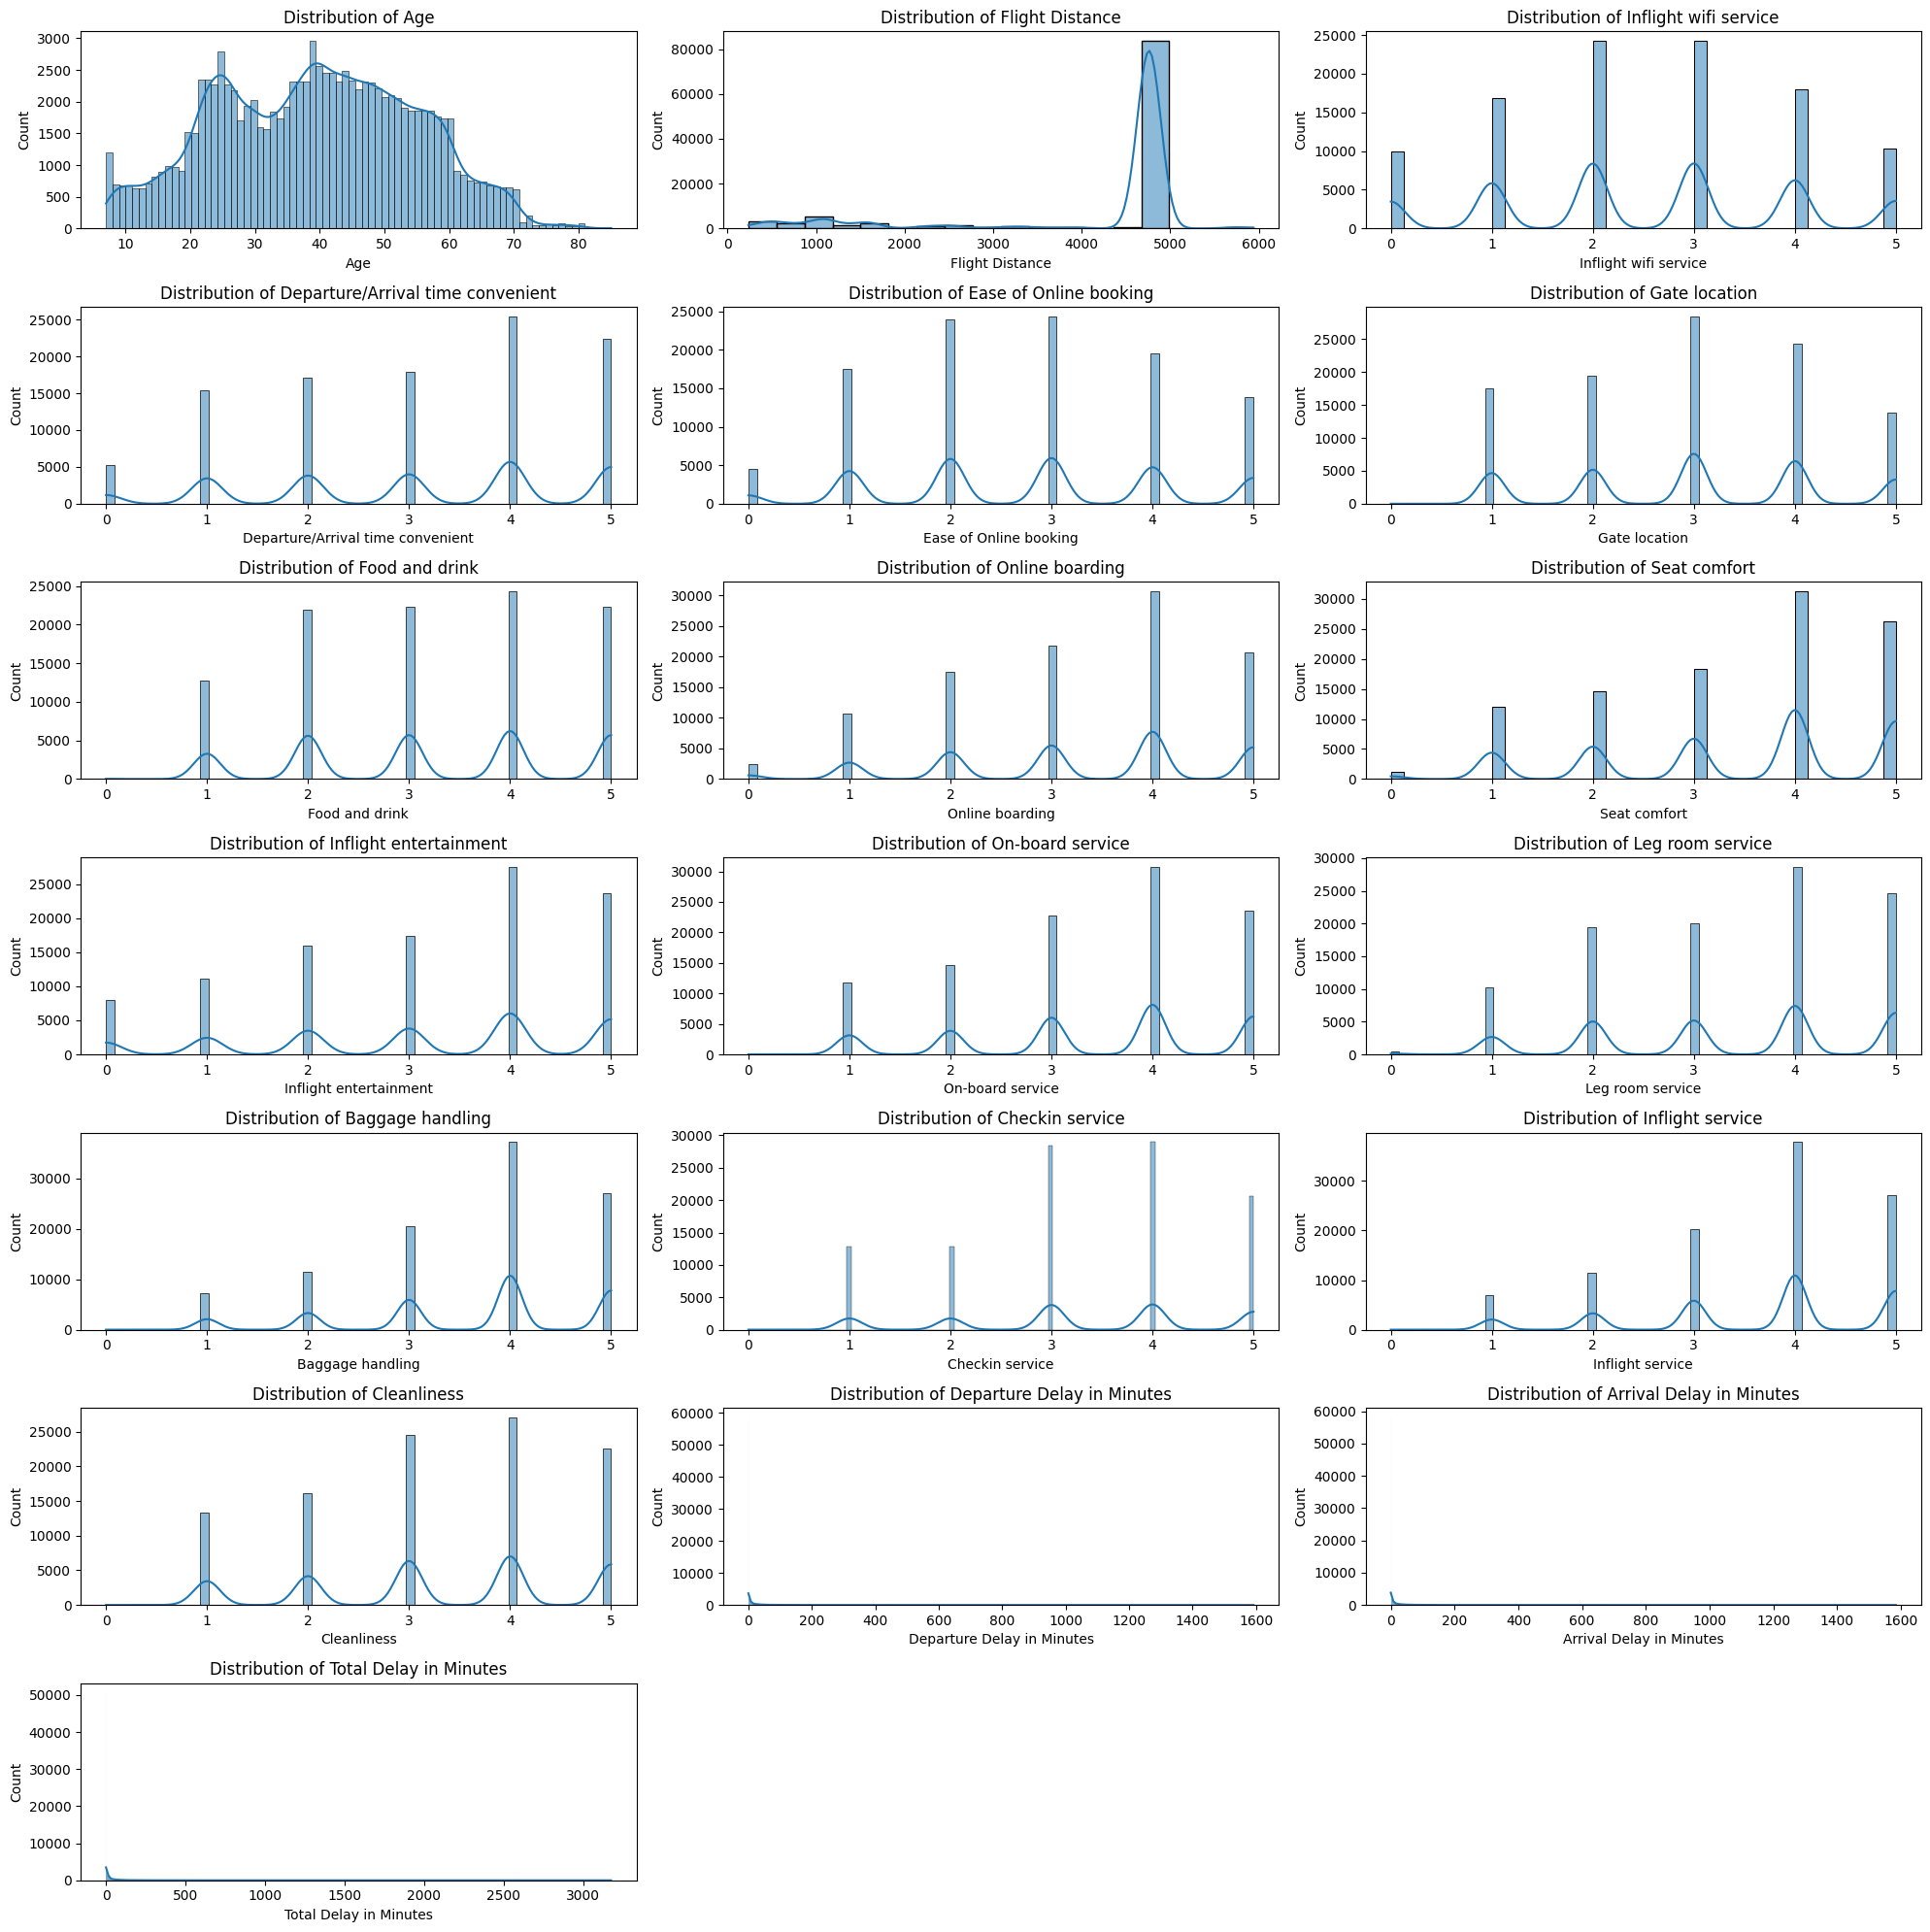

In [40]:
# Histograms for numerical variables
numerical_columns = ['Age', 'Flight Distance', 'Inflight wifi service',
                     'Departure/Arrival time convenient', 'Ease of Online booking',
                     'Gate location', 'Food and drink', 'Online boarding',
                     'Seat comfort', 'Inflight entertainment', 'On-board service',
                     'Leg room service', 'Baggage handling', 'Checkin service',
                     'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
                     'Arrival Delay in Minutes', 'Total Delay in Minutes']

plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(7, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

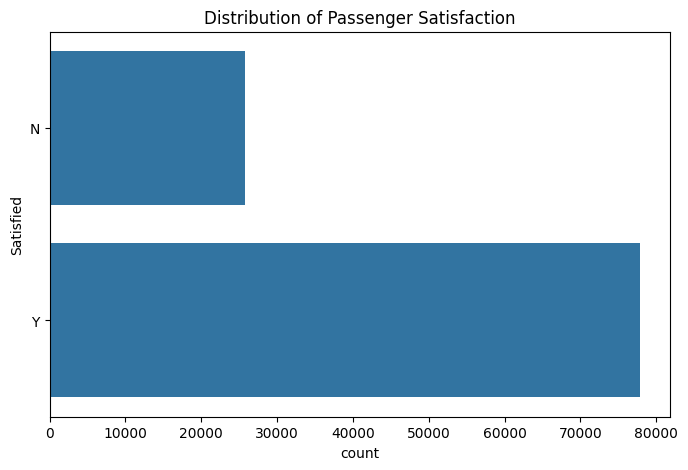

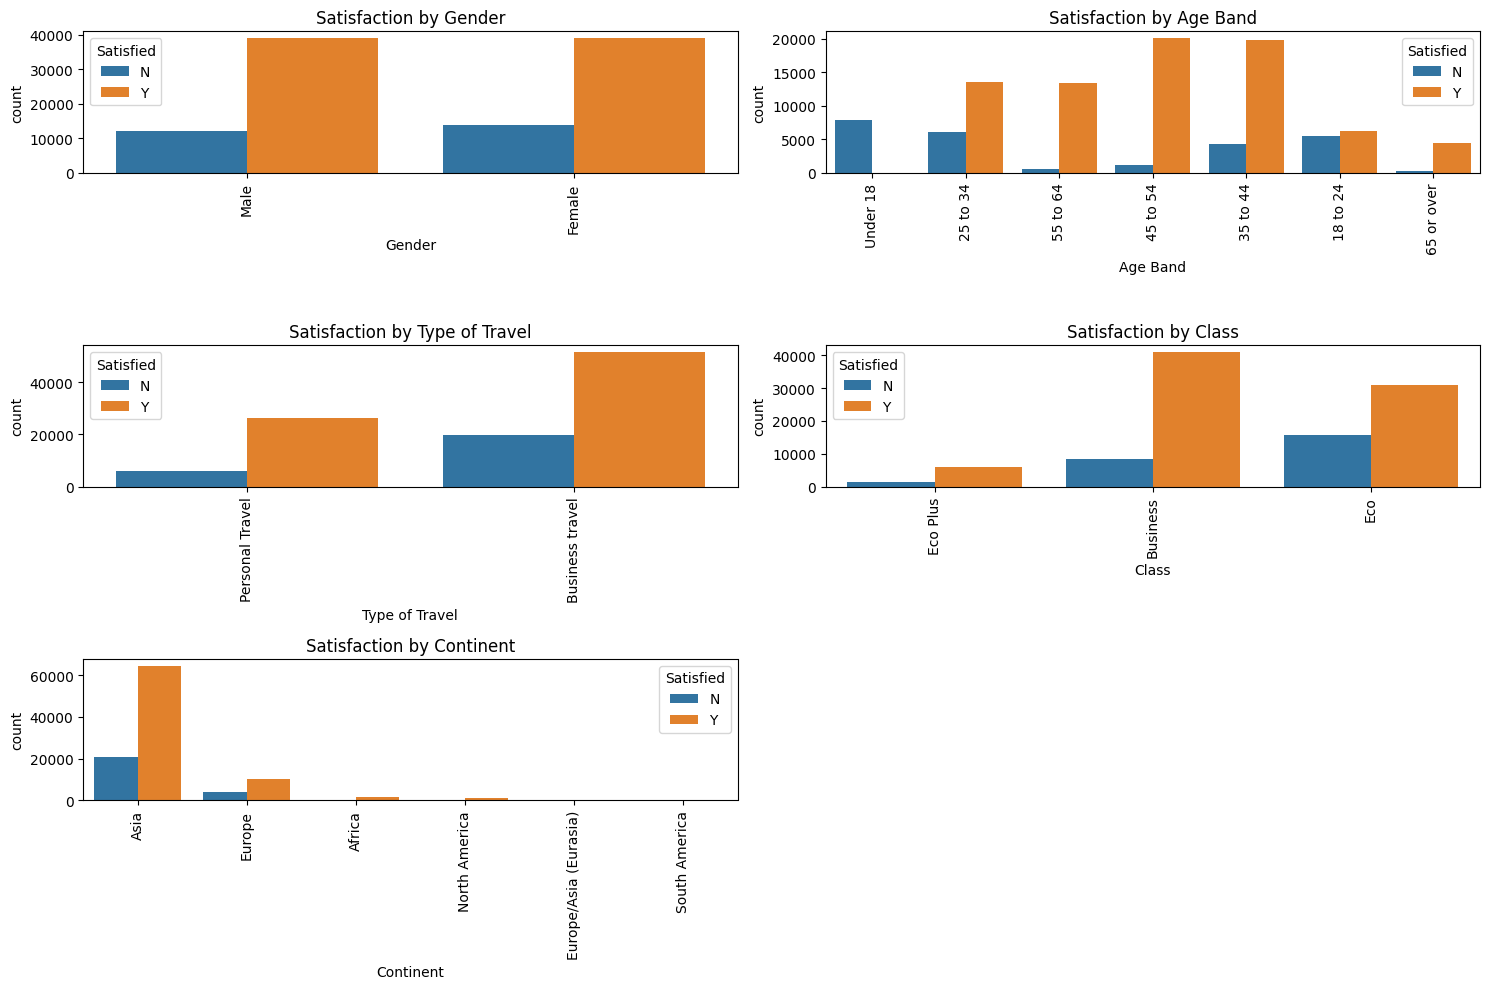

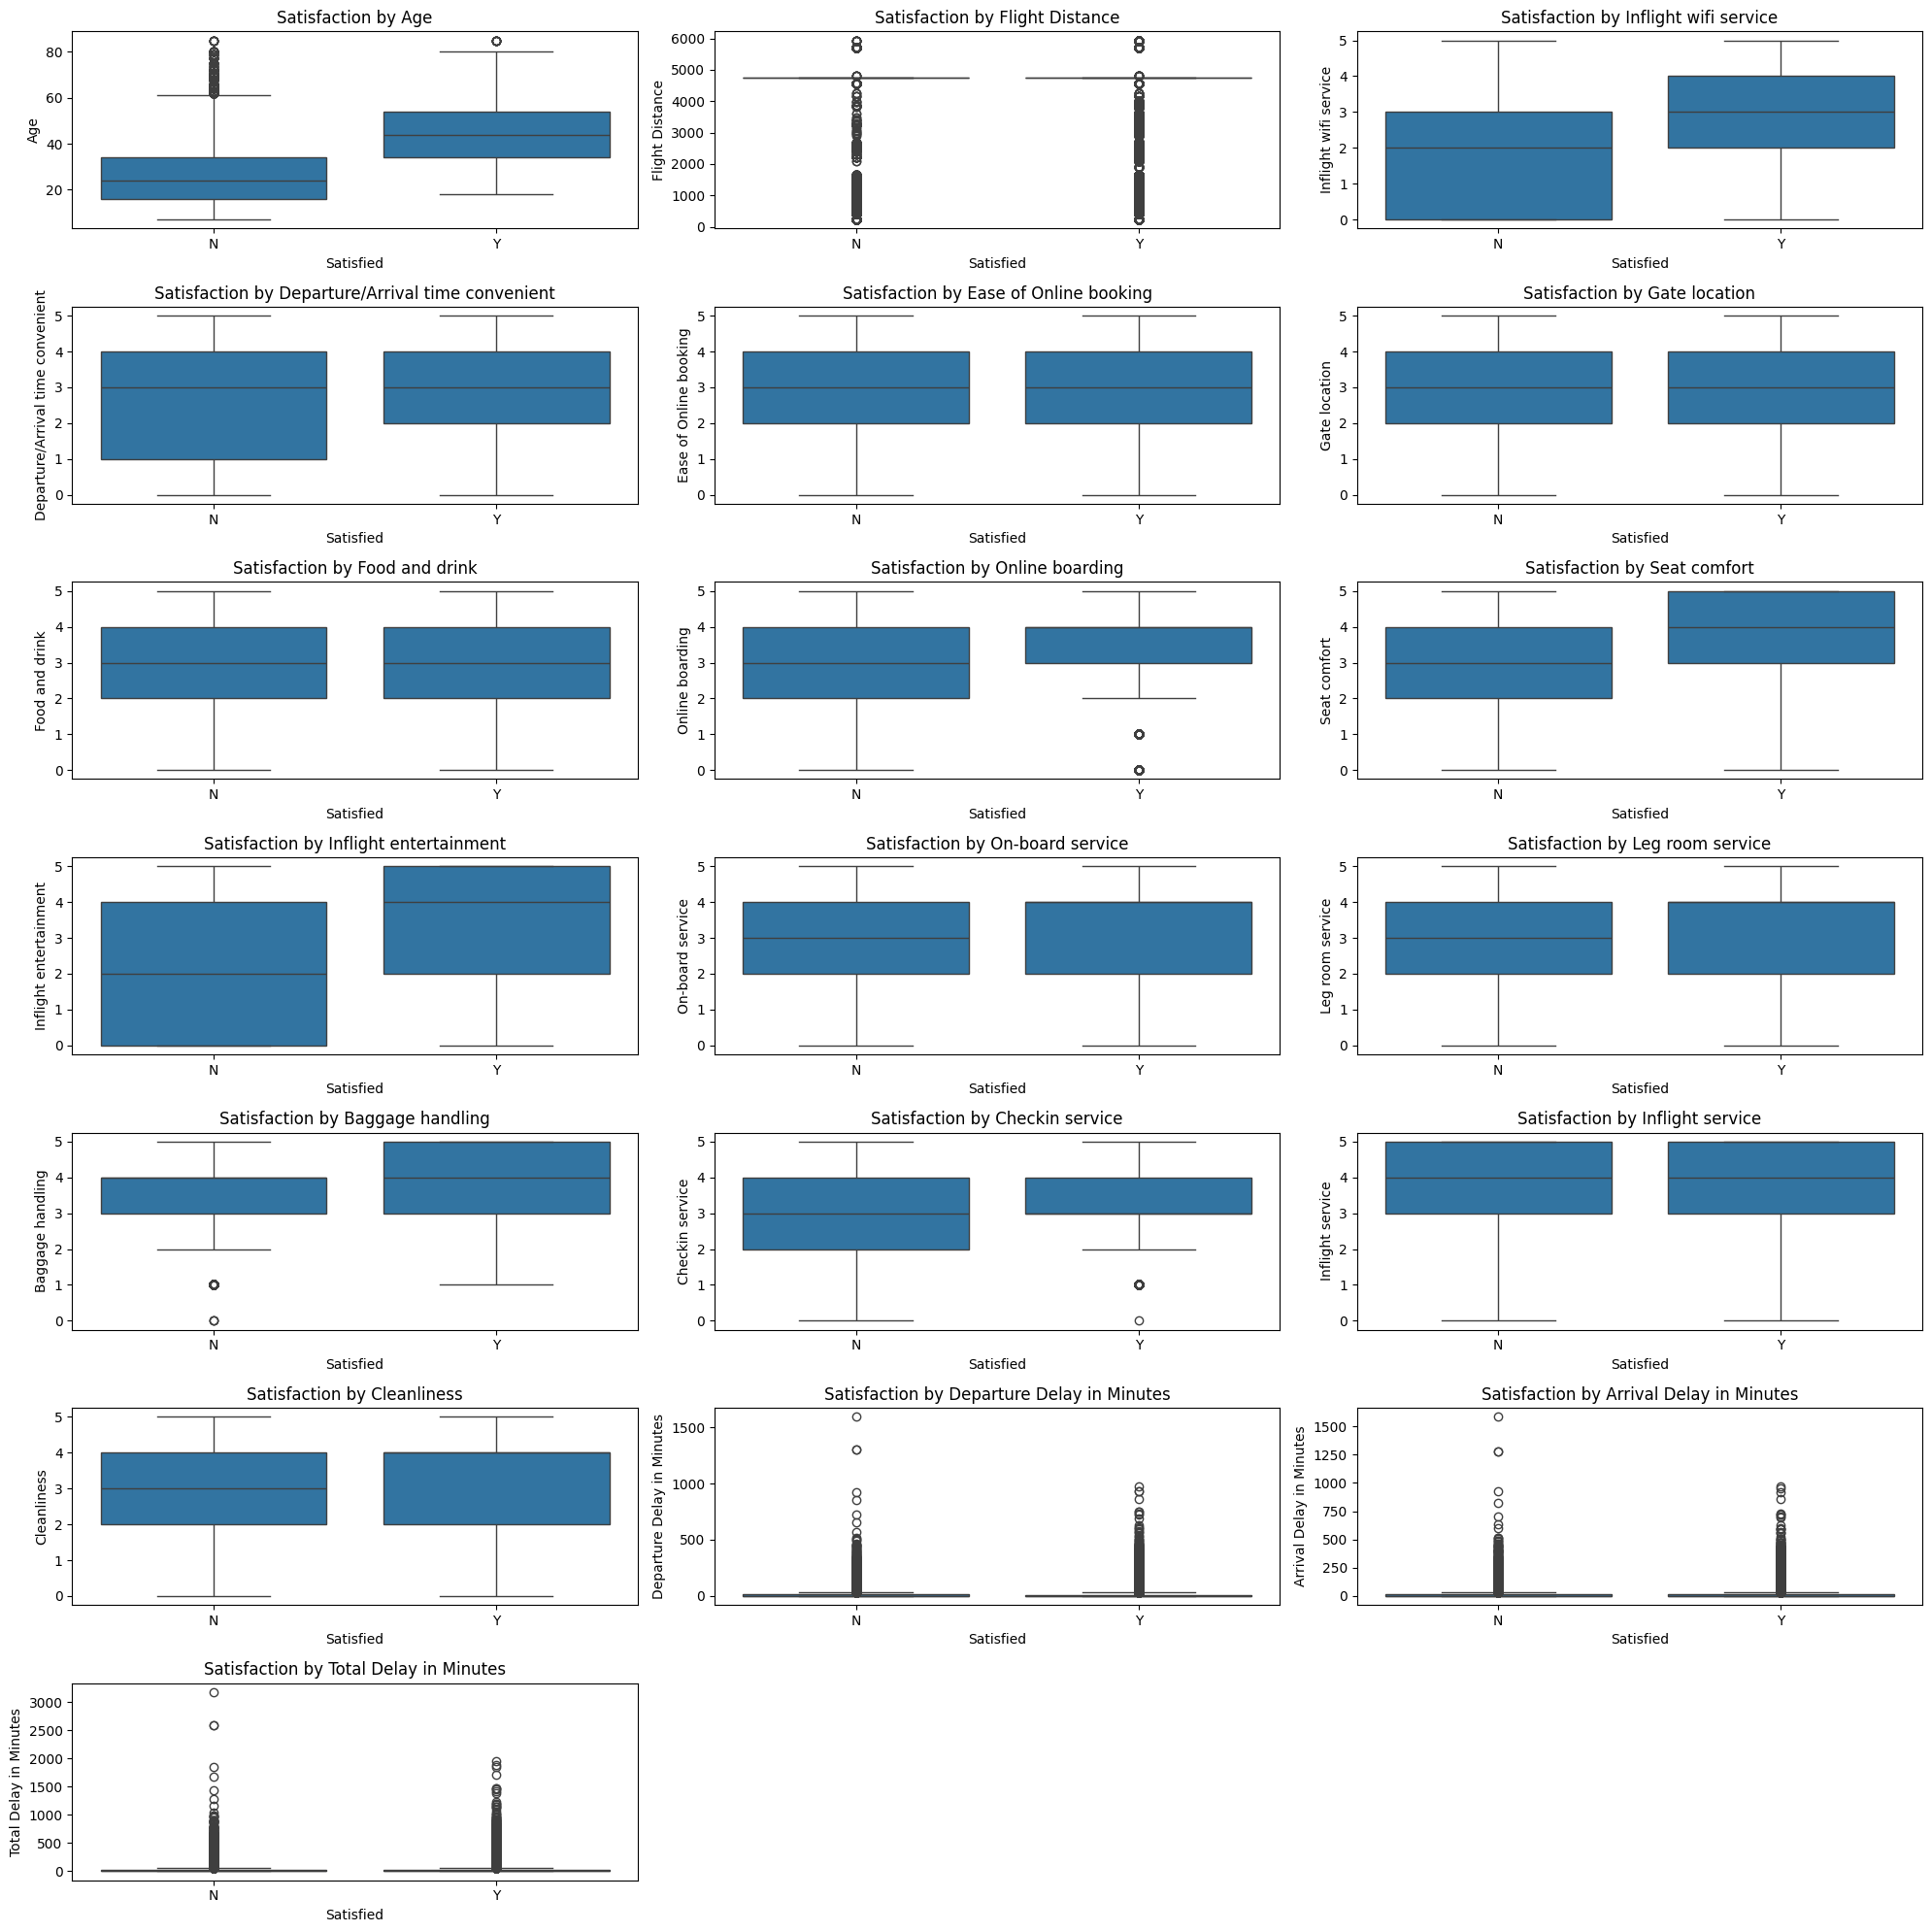

In [42]:
# Count plot for 'Satisfied'
plt.figure(figsize=(8, 5))
sns.countplot(data['Satisfied'])
plt.title('Distribution of Passenger Satisfaction')
plt.show()

# Satisfaction by categorical variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, hue='Satisfied', data=data)
    plt.title(f'Satisfaction by {column}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Satisfaction by numerical variables
plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(x='Satisfied', y=column, data=data)
    plt.title(f'Satisfaction by {column}')
plt.tight_layout()
plt.show()

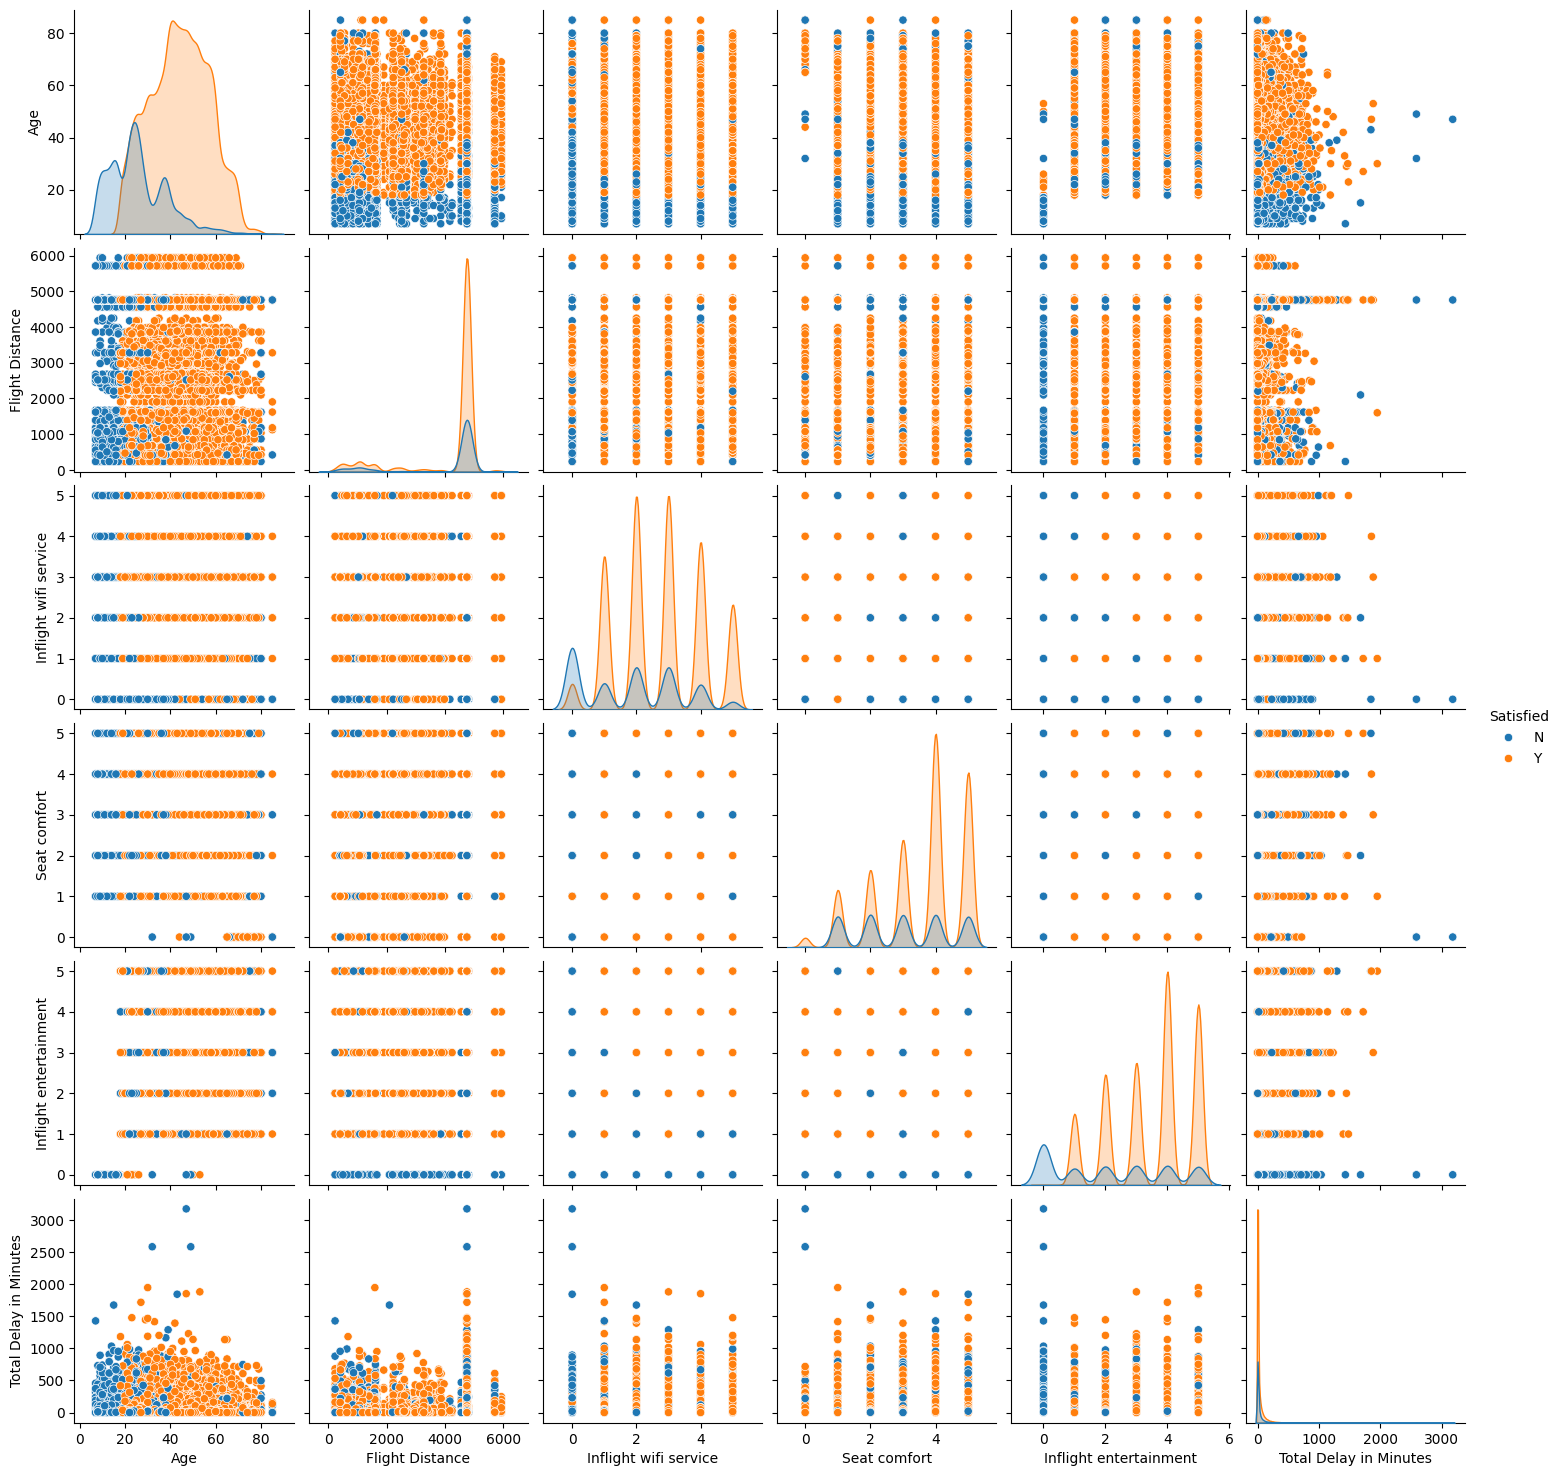

In [43]:
# Pairplot for selected numerical variables
selected_numerical_columns = ['Age', 'Flight Distance', 'Inflight wifi service',
                              'Seat comfort', 'Inflight entertainment', 'Total Delay in Minutes']

sns.pairplot(data[selected_numerical_columns + ['Satisfied']], hue='Satisfied')
plt.show()

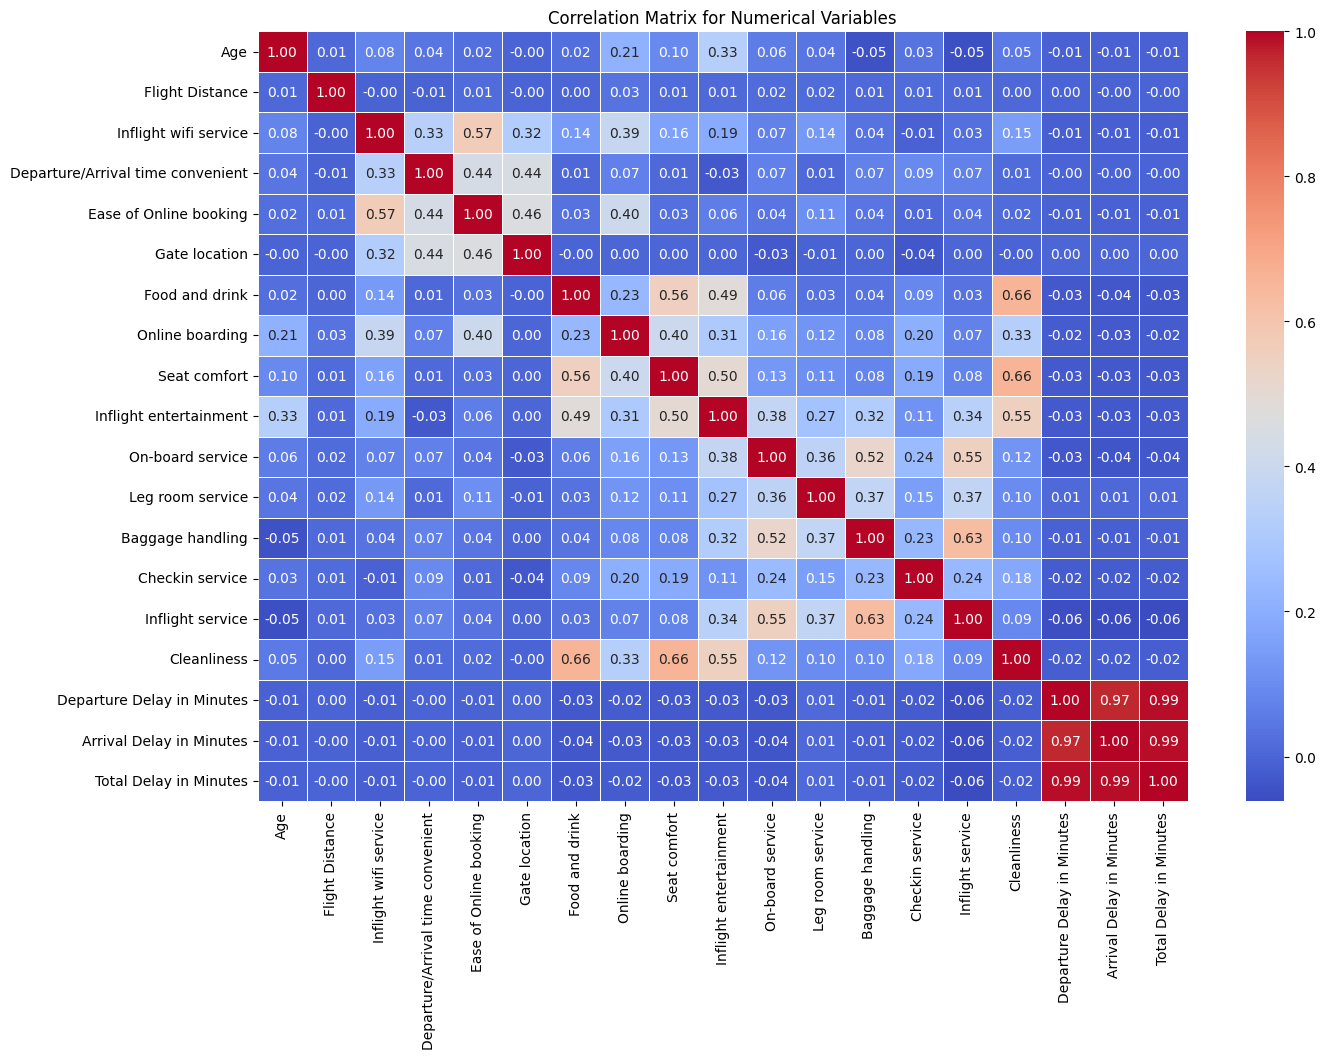

In [44]:
numerical_data = data[numerical_columns]

# Generate the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

# **Data Preprocessing**

In [46]:
# Drop the 'Destination' column
data.drop(columns=['Destination'], inplace=True)

In [47]:
# Initialize the label encoder
le = LabelEncoder()

# Columns to be label encoded
categorical_columns = ['Gender', 'Satisfied', 'Age Band', 'Type of Travel', 'Class', 'Continent']

# Apply label encoding to each of these columns
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

# Display the updated dataframe
data.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Continent,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Total Delay in Minutes
0,0,70172,1,0,13,6,1,2,4760,1,...,0,4,3,4,4,5,5,25,18,43
1,1,5047,1,0,25,1,0,0,235,2,...,1,1,5,3,1,4,1,1,6,7
2,2,110028,0,1,26,1,0,0,4760,1,...,5,4,3,4,4,4,5,0,0,0
3,3,24026,0,1,25,1,0,0,560,2,...,2,2,5,3,1,4,2,11,9,20
4,4,119299,1,1,61,4,0,0,4760,1,...,3,3,4,4,3,3,3,0,0,0


# **Model Training (Decision Tree and XGBoost)**

In [49]:
# Define feature variables (X) and target variable (y)
X = data.drop(columns=['Satisfied'])
y = data['Satisfied']

In [50]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (82875, 26)
X_test shape: (20719, 26)
y_train shape: (82875,)
y_test shape: (20719,)


In [51]:
# Initialize the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
decision_tree_model.fit(X_train, y_train)

# Print completion message
print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


In [52]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Print completion message
print("XGBoost model trained successfully.")

XGBoost model trained successfully.


# **Evaluating the Models**

In [54]:
# Predict on test data
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Decision Tree Confusion Matrix:\n {confusion_dt}")
print(f"Decision Tree ROC AUC Score: {roc_auc_dt}")

Decision Tree Accuracy: 0.98286596843477
Decision Tree Confusion Matrix:
 [[ 4913   171]
 [  184 15451]]
Decision Tree ROC AUC Score: 0.9772982993480552


In [55]:
# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost Confusion Matrix:\n {confusion_xgb}")
print(f"XGBoost ROC AUC Score: {roc_auc_xgb}")

XGBoost Accuracy: 0.9927120034750712
XGBoost Confusion Matrix:
 [[ 4981   103]
 [   48 15587]]
XGBoost ROC AUC Score: 0.9989872099480249


In [57]:
# Create a comparison table
comparison_table = pd.DataFrame({
    'Model': ['Decision Tree', 'XGBoost'],
    'Accuracy': [accuracy_dt, accuracy_xgb],
    'Correct Predictions': [confusion_dt[0, 0] + confusion_dt[1, 1], confusion_xgb[0, 0] + confusion_xgb[1, 1]],
    'Incorrect Predictions': [confusion_dt[0, 1] + confusion_dt[1, 0], confusion_xgb[0, 1] + confusion_xgb[1, 0]],
    'ROC AUC Score': [roc_auc_dt, roc_auc_xgb]
})

print("Comparison Table:")
comparison_table

Comparison Table:


,Model,Accuracy,Correct Predictions,Incorrect Predictions,ROC AUC Score
0,Decision Tree,0.982866,20364,355,0.977298
1,XGBoost,0.992712,20568,151,0.998987


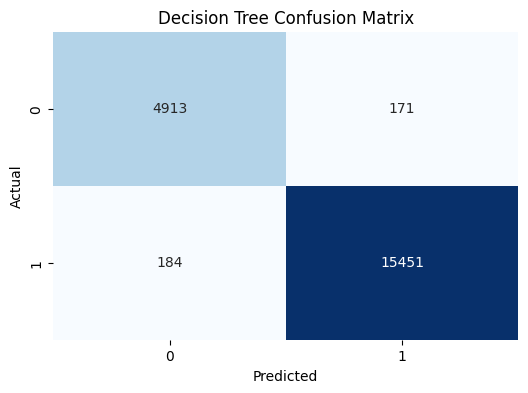

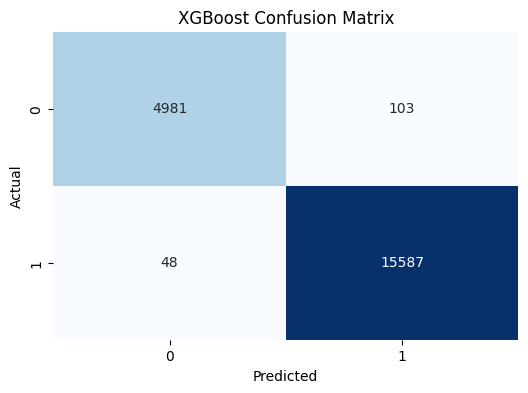

In [58]:
# Function to plot confusion matrix
def plot_confusion_matrix(confusion, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(confusion_dt, "Decision Tree Confusion Matrix")
plot_confusion_matrix(confusion_xgb, "XGBoost Confusion Matrix")

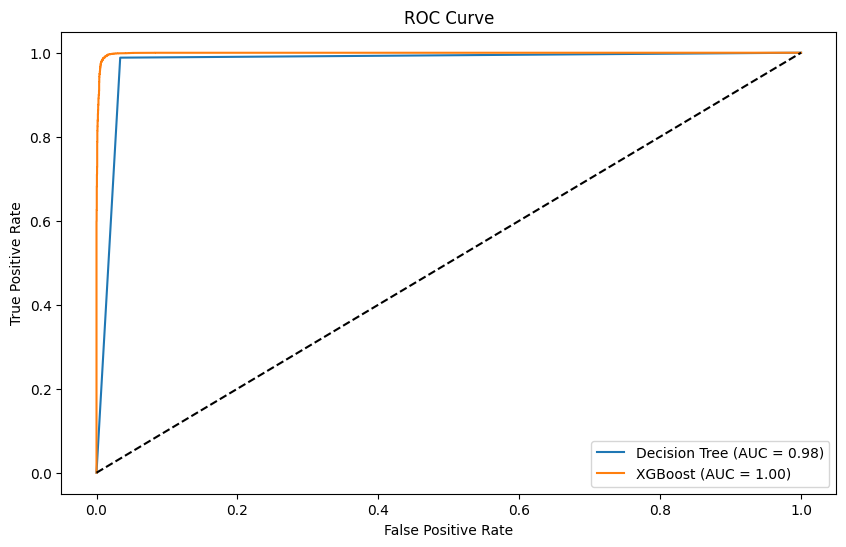

In [59]:
# Plot ROC Curve
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')

plt.figure(figsize=(10, 6))
plot_roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1], "Decision Tree")
plot_roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1], "XGBoost")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()